In [1]:
from datasets import load_dataset, Dataset, concatenate_datasets
import datasets
import PIL

In [2]:
animals_10 = load_dataset("dgrnd4/animals-10")
oxford_pets = load_dataset("pcuenq/oxford-pets")
cat_and_dogs = load_dataset("Bingsu/Cat_and_Dog")
stanford_dogs = load_dataset("dgrnd4/stanford_dog_dataset")

Using custom data configuration dgrnd4--animals-10-943adb6bc86de3f0
Found cached dataset imagefolder (D:/cache/huggingface/datasets/dgrnd4___imagefolder/dgrnd4--animals-10-943adb6bc86de3f0/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration pcuenq--oxford-pets-43375e644eed3d52
Found cached dataset parquet (D:/cache/huggingface/datasets/pcuenq___parquet/pcuenq--oxford-pets-43375e644eed3d52/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration Bingsu--Cat_and_Dog-700815090bea8354
Found cached dataset parquet (D:/cache/huggingface/datasets/Bingsu___parquet/Bingsu--Cat_and_Dog-700815090bea8354/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

Using custom data configuration dgrnd4--stanford_dog_dataset-1893e9c7d43cfe52
Found cached dataset imagefolder (D:/cache/huggingface/datasets/dgrnd4___imagefolder/dgrnd4--stanford_dog_dataset-1893e9c7d43cfe52/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

Animals 10
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

In [3]:
animals_10['train'].features['label']

ClassLabel(names=['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo'], id=None)

In [4]:
animals_10['train']

Dataset({
    features: ['image', 'label'],
    num_rows: 26179
})

In [5]:
def add_animal_10_text(example):
    animals = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
    animal_translate = {"cane": "dog", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "cavallo": "horse","ragno": "spider"}
    example["caption"] = animal_translate[animals[example['label']]]
    return example

In [6]:
animals_10_caption = animals_10.map(add_animal_10_text)

Loading cached processed dataset at D:\cache\huggingface\datasets\dgrnd4___imagefolder\dgrnd4--animals-10-943adb6bc86de3f0\0.0.0\37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f\cache-2ea95a1962aa8d4e.arrow


In [7]:
oxford_pets['train']

Dataset({
    features: ['path', 'label', 'dog', 'image'],
    num_rows: 7390
})

In [8]:
def add_oxford_pets_text(example):
    example["caption"] = example['label']
    return example

In [9]:
oxford_pets_caption = oxford_pets.map(add_oxford_pets_text)

Loading cached processed dataset at D:\cache\huggingface\datasets\pcuenq___parquet\pcuenq--oxford-pets-43375e644eed3d52\0.0.0\2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec\cache-a06272d69415f0b8.arrow


In [10]:
cat_and_dogs

DatasetDict({
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 2000
    })
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 8000
    })
})

In [11]:
def add_cat_and_dogs_text(example):
    animals = ['cat', 'dog']
    example["caption"] = animals[example['labels']]
    return example

In [12]:
cat_and_dogs_caption = cat_and_dogs.map(add_cat_and_dogs_text)

Loading cached processed dataset at D:\cache\huggingface\datasets\Bingsu___parquet\Bingsu--Cat_and_Dog-700815090bea8354\0.0.0\2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec\cache-5d912204586c2d51.arrow
Loading cached processed dataset at D:\cache\huggingface\datasets\Bingsu___parquet\Bingsu--Cat_and_Dog-700815090bea8354\0.0.0\2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec\cache-0b51522a3554d056.arrow


In [13]:
dogs = ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_terrier', 'n02095314-wire-haired_fox_terrier', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02096294-Australian_terrier', 'n02096437-Dandie_Dinmont', 'n02096585-Boston_bull', 'n02097047-miniature_schnauzer', 'n02097130-giant_schnauzer', 'n02097209-standard_schnauzer', 'n02097298-Scotch_terrier', 'n02097474-Tibetan_terrier', 'n02097658-silky_terrier', 'n02098105-soft-coated_wheaten_terrier', 'n02098286-West_Highland_white_terrier', 'n02098413-Lhasa', 'n02099267-flat-coated_retriever', 'n02099429-curly-coated_retriever', 'n02099601-golden_retriever', 'n02099712-Labrador_retriever', 'n02099849-Chesapeake_Bay_retriever', 'n02100236-German_short-haired_pointer', 'n02100583-vizsla', 'n02100735-English_setter', 'n02100877-Irish_setter', 'n02101006-Gordon_setter', 'n02101388-Brittany_spaniel', 'n02101556-clumber', 'n02102040-English_springer', 'n02102177-Welsh_springer_spaniel', 'n02102318-cocker_spaniel', 'n02102480-Sussex_spaniel', 'n02102973-Irish_water_spaniel', 'n02104029-kuvasz', 'n02104365-schipperke', 'n02105056-groenendael', 'n02105162-malinois', 'n02105251-briard', 'n02105412-kelpie', 'n02105505-komondor', 'n02105641-Old_English_sheepdog', 'n02105855-Shetland_sheepdog', 'n02106030-collie', 'n02106166-Border_collie', 'n02106382-Bouvier_des_Flandres', 'n02106550-Rottweiler', 'n02106662-German_shepherd', 'n02107142-Doberman', 'n02107312-miniature_pinscher', 'n02107574-Greater_Swiss_Mountain_dog', 'n02107683-Bernese_mountain_dog', 'n02107908-Appenzeller', 'n02108000-EntleBucher', 'n02108089-boxer', 'n02108422-bull_mastiff', 'n02108551-Tibetan_mastiff', 'n02108915-French_bulldog', 'n02109047-Great_Dane', 'n02109525-Saint_Bernard', 'n02109961-Eskimo_dog', 'n02110063-malamute', 'n02110185-Siberian_husky', 'n02110627-affenpinscher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian', 'n02112137-chow', 'n02112350-keeshond', 'n02112706-Brabancon_griffon', 'n02113023-Pembroke', 'n02113186-Cardigan', 'n02113624-toy_poodle', 'n02113712-miniature_poodle', 'n02113799-standard_poodle', 'n02113978-Mexican_hairless', 'n02115641-dingo', 'n02115913-dhole', 'n02116738-African_hunting_dog']

In [14]:
filtered_dogs =[dog[10:] for dog in dogs]

In [15]:
def add_stanford_text(example):
    example["caption"] = filtered_dogs[example['label']]
    return example

In [16]:
stanford_dogs_caption = stanford_dogs.map(add_stanford_text)

Loading cached processed dataset at D:\cache\huggingface\datasets\dgrnd4___imagefolder\dgrnd4--stanford_dog_dataset-1893e9c7d43cfe52\0.0.0\37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f\cache-35b9232e2948fa9c.arrow


In [17]:
animals_10_caption, oxford_pets_caption, cat_and_dogs_caption, stanford_dogs_caption

(DatasetDict({
     train: Dataset({
         features: ['image', 'label', 'caption'],
         num_rows: 26179
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['path', 'label', 'dog', 'image', 'caption'],
         num_rows: 7390
     })
 }),
 DatasetDict({
     test: Dataset({
         features: ['image', 'labels', 'caption'],
         num_rows: 2000
     })
     train: Dataset({
         features: ['image', 'labels', 'caption'],
         num_rows: 8000
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['image', 'label', 'caption'],
         num_rows: 20580
     })
 }))

In [18]:
animals_10_caption = animals_10_caption.remove_columns('label')

In [19]:
oxford_pets_caption = oxford_pets_caption.remove_columns(['path', 'label', 'dog'])

In [20]:
cat_and_dogs_caption = cat_and_dogs_caption.remove_columns('labels')

In [21]:
stanford_dogs_caption = stanford_dogs_caption.remove_columns('label')

In [22]:
animals_10_img = animals_10_caption['train'][0]['image']

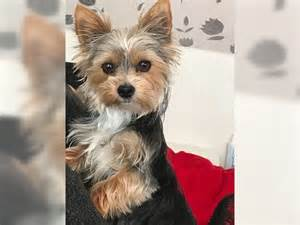

In [23]:
animals_10_img

In [24]:
oxford_pets_img = oxford_pets_caption['train'][0]['image']

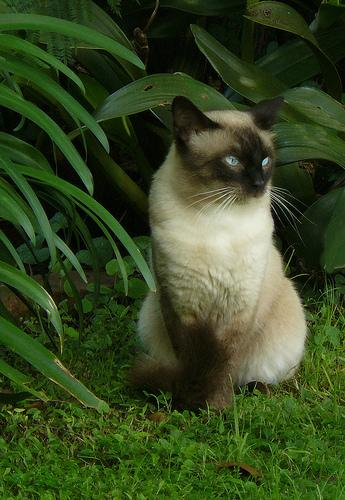

In [25]:
oxford_pets_img

In [26]:
cat_and_dogs_img = cat_and_dogs_caption['train'][0]['image']

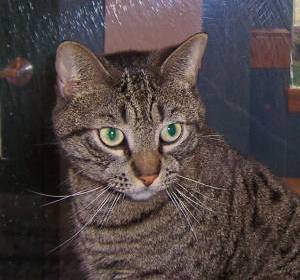

In [27]:
cat_and_dogs_img

In [28]:
stanford_dogs_img = stanford_dogs_caption['train'][0]['image']

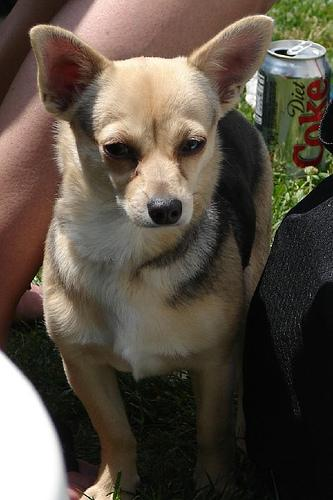

In [29]:
stanford_dogs_img

In [30]:
animal_dataset = concatenate_datasets([animals_10_caption['train'], oxford_pets_caption['train'], cat_and_dogs_caption['train'], stanford_dogs_caption['train']])

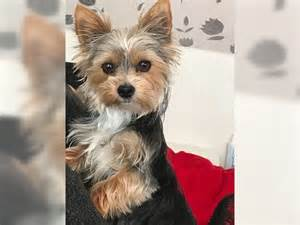

In [31]:
animal_dataset[0]['image']

In [32]:
animal_dataset.push_to_hub("Isamu136/big-animal-dataset")

  0%|          | 0/21 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?ba/s]

  0%|          | 0/21 [00:00<?, ?ba/s]

['.gitattributes', 'data/train-00000-of-00003-b0e3a3345037ee65.parquet', 'data/train-00001-of-00003-32ac7a4ee78dc9a7.parquet', 'data/train-00002-of-00003-e455e1e1c988584f.parquet']
